# Backpropagation Lab





In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy

For one run observe the softmax probabilities on the test set using clf.predict_proba

In [ ]:
#Iris with no regularization

def no_overfit_avoid(X, y):
  y_encoded = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True)

  clf = MLPClassifier(hidden_layer_sizes=(64,), activation='logistic', solver='sgd',
                    alpha=0, batch_size=1, learning_rate_init=0.01, shuffle=True,
                    momentum=0, n_iter_no_change=50, max_iter=1000)

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  train_accuracy = clf.score(X_train, y_train)
  test_accuracy = accuracy_score(y_test, y_pred)

  return clf.n_iter_, train_accuracy, test_accuracy, clf.predict_proba(X_test)

iris = load_iris()
X = iris.data
y = iris.target

tot_iter = 0
tot_train = 0
tot_test = 0
obs_pred = None
for i in range(5):
  iter, train, test, pred = no_overfit_avoid(X, y)
  tot_iter += iter
  tot_train += train
  tot_test += test
  if i==0:
    obs_pred = pred

print(tot_iter/5, tot_train/5, tot_test/5)
print(obs_pred)

295.0 0.9799999999999999 0.9866666666666667
[[6.13789809e-07 3.36162575e-03 9.99610674e-01]
 [3.71681589e-06 2.54725295e-02 9.85909512e-01]
 [1.97058365e-04 9.46122243e-01 2.11838264e-02]
 [9.99343491e-01 4.85167963e-03 9.06453592e-13]
 [9.50838389e-04 9.92921442e-01 9.90322914e-04]
 [9.99510537e-01 3.03632679e-03 6.27113624e-13]
 [2.55830482e-02 9.97877287e-01 2.78160843e-06]
 [9.99168358e-01 3.87439182e-03 1.45256732e-12]
 [9.99379355e-01 4.75969364e-03 8.34500683e-13]
 [9.99012514e-01 5.99683678e-03 1.68185456e-12]
 [5.37525915e-06 5.14978625e-02 9.70351684e-01]
 [1.35693984e-03 9.95388086e-01 4.86826287e-04]
 [9.99430382e-01 4.13095954e-03 7.45432952e-13]
 [9.99780750e-01 1.95151176e-03 1.83011476e-13]
 [5.86582780e-03 9.98099928e-01 3.12912246e-05]
 [1.61489180e-02 9.99326268e-01 4.24781122e-06]
 [1.01903400e-05 1.42883734e-01 8.89047179e-01]
 [1.85623094e-04 9.50887885e-01 2.37882613e-02]
 [5.58862999e-06 4.88690051e-02 9.70898785e-01]
 [1.98206416e-06 1.08284177e-02 9.96266161e-

*Discussion*

In this task I trained the sklearn MLP classifier on the Iris Dataset. I expanded the one output variable into 3 via the Pandas get_dummies method, made an MLPClassifier with the hyperparameters defined above, and trained it a few times on the Iris dataset to get accuracies. I did this because I wanted to learn how to use MLP classifiers. The accuracy is very high. This is because MLP classifiers are very good at solving problems like these, as discussed in class. Note the softmax probabilities listed below the accuracies. I was surprised to observe that the probabilities change a lot for each sample. I am not sure why this is, but my hypothesis is that it is because they are small samples that would round out to much more balanced numbers if averaged together.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

19.2 0.645 0.6 0.7


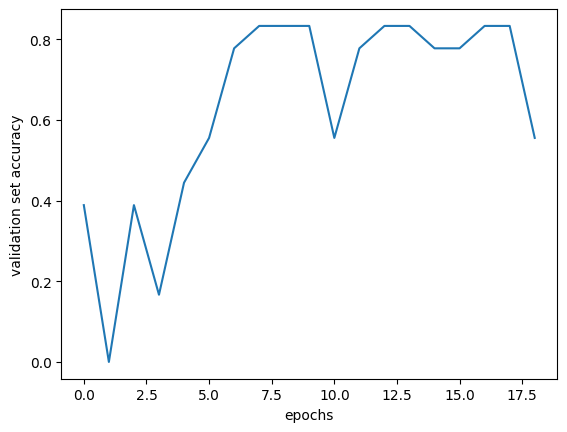

In [ ]:
#Iris with early stopping and validation scores graph

def early_stopping(X, y):
  y_encoded = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True)

  clf = MLPClassifier(hidden_layer_sizes=(64,), activation='logistic', solver='sgd',
                    alpha=0, batch_size=1, learning_rate_init=0.01, shuffle=True,
                    momentum=0, n_iter_no_change=10, max_iter=1000, early_stopping=True,
                    validation_fraction=0.15)

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  train_accuracy = clf.score(X_train, y_train)
  test_accuracy = accuracy_score(y_test, y_pred)

  return clf.n_iter_, train_accuracy, test_accuracy, clf.best_validation_score_, clf.validation_scores_

iris = load_iris()
X = iris.data
y = iris.target

tot_iter = 0
tot_train = 0
tot_test = 0
tot_BVS = 0
obs_VSs = None
for i in range(5):
  iter, train, test, BVS, VSs = early_stopping(X, y)
  tot_iter += iter
  tot_train += train
  tot_test += test
  tot_BVS += BVS
  if i==0:
    obs_VSs = VSs

print(tot_iter/5, tot_train/5, tot_test/5, tot_BVS/5)

plt.plot(range(len(obs_VSs)), obs_VSs)
plt.xlabel("epochs")
plt.ylabel("validation set accuracy")
plt.show()

*Discussion of average values above and the validation score graph*

In this task I trained the sklearn MLP classifier on the Iris Dataset with early stopping. I copied over the code from 1.1, heavily modified it to use early stopping, and graphed the accuracy/epoch relationship. I did this because I wanted to see how the MLPC performed on Iris with early stopping. The accuracy spikes up and plateaus about half-way through. This is because it has found a local optimum. Note that this accuracy is not as high as 1.1. I was surprised to observe that it was still able to reach over 50% accuracy with only 20ish iterations. I am not sure why it performs this well, but my hypothesis is that it has to do with the Iris dataset being somewhat easy to classify.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

 alpha  | iterations | train accuracy | test accuracy | best loss
0.10000 |    173     |     0.442      |     0.567     |   1.641
0.01000 |    253     |     0.975      |     0.967     |   0.798
0.00100 |    320     |     0.975      |     1.000     |   0.250
0.00010 |    374     |     0.975      |     0.967     |   0.115
0.00001 |    388     |     0.950      |     0.967     |   0.126


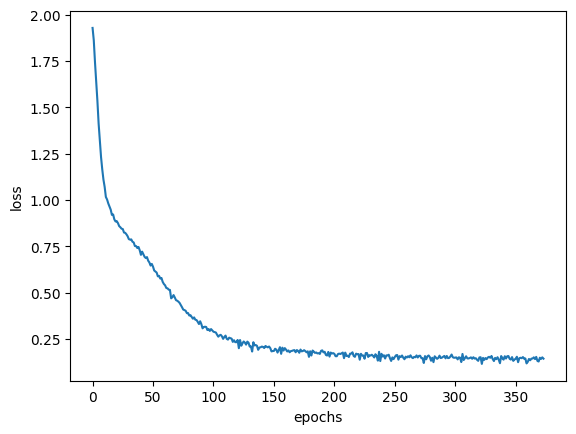

In [ ]:
#Iris with Loss Regularization

def loss_regularization(X, y, L2):
  y_encoded = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True)

  clf = MLPClassifier(hidden_layer_sizes=(64,), activation='logistic', solver='sgd',
                    alpha=L2, batch_size=1, learning_rate_init=0.01, shuffle=True,
                    momentum=0, n_iter_no_change=50, max_iter=1000)

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  train_accuracy = clf.score(X_train, y_train)
  test_accuracy = accuracy_score(y_test, y_pred)

  return clf.n_iter_, train_accuracy, test_accuracy, clf.best_loss_, clf.loss_curve_

iris = load_iris()
X = iris.data
y = iris.target

print(' alpha  | iterations | train accuracy | test accuracy | best loss')
RVs = [0.1, 0.01, 0.001, 0.0001, 0.00001]
best_loss = 1
BRV_loss = None
for i in range(len(RVs)):
  iter, train, test, loss, curve = loss_regularization(X, y, RVs[i])
  print(f'{RVs[i]:.5f} |    {iter}     |     {train:.3f}      |     {test:.3f}     |   {loss:.3f}')
  if loss < best_loss:
    best_loss = loss
    BRV_loss = curve

plt.plot(range(len(BRV_loss)), BRV_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

*Discussion and comparison between no regularization, early stopping and loss regularization*

In this task I trained the sklearn MLP classifier on the Iris Dataset with loss regularization. I copied over the code from 1.1, heavily modified it to use loss regularization, and graphed the loss/epoch relationship. I did this because I wanted to see how the MLPC performed on Iris with loss regularization. The loss is cut in half (or more) with each decimal place movement. This is because taking smaller steps allows it to not miss better optimums. Note that the loss/epoch graph has an exponential decay curve. I was surprised to observe that some of the testing accuracies actually reached 100%. I am not sure why it performs so well, but my hypothesis is that I chose just the right alphas to make it happen.

No regularization performs well but takes a while to run. Early stopping saves on time but performs poorly. Loss regularization performs better or worse with longer or shorter run times based on what alpha you feed it.

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

*Discuss these items here*

The baseline accuracy for the Iris dataset would be 33%. This is because the data is split evenly into three classes (50 instances per class). The baseline accuracy for the Vowel dataset would be 9%. This is because the data is split evenly into 11 classes (90 instances per class). The Vowel dataset will probably have lower accuracy than the Iris dataset because it has more classes to split up, more overlap between those classes, and more variables to account for. Features to avoid in the Vowel dataset include features inherently tied to the speaker and features irrelevant to the task (name and gender), along with features that are highly correlated with other features (if any).

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model a fair chance.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [ ]:
def get_vowel_xy ():
  Data_Set = arff.loadarff('vowel.arff')
  Data_Set_df = pd.DataFrame(Data_Set[0])

  Data_Set_df = Data_Set_df.drop(columns=['Train or Test', 'Speaker Number'])
  Data_Set_df['Sex'] = Data_Set_df['Sex'].str.decode('utf-8')
  Data_Set_df = Data_Set_df.replace('Male', 0)
  Data_Set_df = Data_Set_df.replace('Female', 1)

  Data_Set_np = Data_Set_df.to_numpy()

  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  return X, y

def vowel_mlp_classifier(X, y, hidden, learnrate, mom):
  y_encoded = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, shuffle=True)

  clf = MLPClassifier(hidden_layer_sizes=(hidden,), activation='logistic', solver='sgd',
                    alpha=0, batch_size=1, learning_rate_init=learnrate, shuffle=True,
                    momentum=mom, n_iter_no_change=50, max_iter=1000)

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  train_accuracy = clf.score(X_train, y_train)
  test_accuracy = accuracy_score(y_test, y_pred)

  return clf.n_iter_, train_accuracy, test_accuracy

In [ ]:
# Train with different learning rates

X, y = get_vowel_xy()

print('  LR  | epochs | train accuracy | test accuracy')
LRs = [0.001, 0.01, 0.1, 1, 10]
for i in range(len(LRs)):
  epochs, train, test = vowel_mlp_classifier(X, y, 22, LRs[i], 0)
  print(f'{str(LRs[i]).zfill(5)} |  {str(epochs).zfill(4)}  |     {train:.3f}      |     {test:.3f}')

  LR  | epochs | train accuracy | test accuracy
0.001 |  1000  |     0.492      |     0.431
00.01 |  1000  |     0.973      |     0.819
000.1 |  0394  |     0.923      |     0.782
00001 |  0154  |     0.569      |     0.496
00010 |  0052  |     0.104      |     0.077


*Discuss your table and the effect of different learning rates on both training time and accuracy*

In this task I trained the sklearn MLP classifier on the Vowel Dataset with different learning rates. I copied the code from 1.3, altered it to retrieve+use the Vowel Dataset, and tested the MLPC with different learning rates. I did this because I wanted to see how changing the learning rate affects the MLPC's performance on the Vowel Dataset. Larger learning rates result in less time (epochs) and less accuracy (for train and test). This is because the MLPC's steps become too large to find good optimums. Note that the number of epochs needed drops dramatically with almost every decimal movement. I was surprised to observe that the smallest learning rate was not the most accurate. I am not sure why the most accurate learning rate is 0.01, but my hypothesis is that the Vowel dataset has lots of local optima that make a really small learning rate fail.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [ ]:
# Train with different numbers of hidden nodes

X, y = get_vowel_xy()

print('hidden | epochs | train accuracy | test accuracy')
HNs = [1, 2, 4, 8, 16, 32, 64, 128]
for i in range(len(HNs)):
  epochs, train, test = vowel_mlp_classifier(X, y, HNs[i], 0.01, 0)
  print(f'  {str(HNs[i]).zfill(3)}  |  {str(epochs).zfill(4)}  |     {train:.3f}      |     {test:.3f}')

hidden | epochs | train accuracy | test accuracy
  001  |  0413  |     0.000      |     0.000
  002  |  0337  |     0.116      |     0.113
  004  |  0853  |     0.388      |     0.294
  008  |  1000  |     0.674      |     0.484
  016  |  1000  |     0.894      |     0.762
  032  |  1000  |     0.999      |     0.875
  064  |  1000  |     0.999      |     0.948
  128  |  1000  |     1.000      |     0.895


*Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy*

In this task I trained the sklearn MLP classifier on the Vowel Dataset with different numbers of hidden nodes. I altered the functions in 2.2 to take in different numbers of hidden nodes, copied over the table-making code from 2.2, and modified it to test different numbers of hidden nodes. I did this because I wanted to see what number of hidden nodes resulted in the best performance. The accuracy continues to grow upwards until 64 hidden nodes are used, and then decreases slightly for 128. This is because the model starts to overfit the data. Note that each increase in hidden nodes also increases the time it takes to run the model. I was surprised to observe that the number of epochs doesn't directly correspond to the number of hidden nodes. I am not sure why the epochs start in the medium range then decrease then increase to high ranges, but my hypothesis is that the functions that result from the different numbers of hidden nodes are simply better or worse shapes for this particular dataset.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [ ]:
# Train with different momentum values

X, y = get_vowel_xy()

print('momentum | epochs | train accuracy | test accuracy')
MTs = [0, 0.25, 0.5, 0.75, 0.999]
for i in range(len(MTs)):
  epochs, train, test = vowel_mlp_classifier(X, y, 64, 0.01, MTs[i])
  print(f'  {str(MTs[i]).zfill(5)}  |  {str(epochs).zfill(4)}  |     {train:.3f}      |     {test:.3f}')

momentum | epochs | train accuracy | test accuracy
  00000  |  1000  |     0.999      |     0.927
  00.25  |  1000  |     1.000      |     0.899
  000.5  |  1000  |     1.000      |     0.911
  00.75  |  0936  |     1.000      |     0.903
  0.999  |  0116  |     0.090      |     0.097


*Discuss your table and the effect of momentum on both training time and accuracy*

In this task I trained the sklearn MLP classifier on the Vowel Dataset with different momentums. I altered the functions in 2.2 to take in different momentums, copied over the table-making code from 2.3, and modified it to test different momentums. I did this because I wanted to see what momentum resulted in the best performance. The accuracy is best with no momentum. This is because the momentum is too high and isn't able to settle in any optimums. Note that each increase in momentum decreases the time it takes to run the model. I was surprised to observe that the number of epochs is inverted to the amount of momentum. I am not sure why the having higher momentum decreases the epoch count, but my hypothesis is that having a higher momentum allows the model to easily escape smaller optima while not escaping larger optima.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not always blindly assume that a tool will get you the results you expect and that you may need to consider multiple approaches.

In [ ]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.
from sklearn.model_selection import GridSearchCV

X, y = get_vowel_xy()
Y = pd.get_dummies(y)

clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':( .01, .1), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([32], [64], [128]),
              'momentum':(0, 0.5, 0.75)}
grid = GridSearchCV(clf, parameters)
grid.fit(X,Y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

{'hidden_layer_sizes': [128], 'learning_rate_init': 0.1, 'momentum': 0.5}
0.43838383838383843


In [ ]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=.01, scale=.09), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([32], [64], [128]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,Y)
print(search.best_params_)
print(search.best_score_)

{'hidden_layer_sizes': [32], 'learning_rate_init': 0.06509620637005567, 'momentum': 0.7672357063068849}
0.41717171717171714


*Discussion and comparison of grid and randomized parameter search*

In this task I used grid and random search to find the best MLPClassifier hyperparameters for the Vowel Dataset. I chose the best hyperparameters from 2.2-2.4, plugged them into the grid and random algorithms, and ran them to get the best hyperparameters. I did this because I wanted to see what these algorithms outputted. As you can see, their accuracies are very low. This is because they have early stopping and lower n_iter_no_change-s. Note that neither accuracy is over 50%. I was surprised to observe that the hyperparameters they chose were quite different, but that the accuracies were basically the same. I am not sure why such different hyperparameters were chosen, but my hypothesis is that the random nature of the random search algorithm was what caused the difference.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great place to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [ ]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

def get_autompg_xy ():
  Data_Set = arff.loadarff('autompg.arff')
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.dropna()

  Data_Set_np = Data_Set_df.to_numpy()
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  return X, y

def autompg_mlp_regressor(X, y, HLs=100, Act='relu', Slvr='adam', BS='auto', LR='constant'):
  Y = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)

  clf = MLPRegressor(hidden_layer_sizes=(HLs,), activation=Act, solver=Slvr,
                    batch_size=BS, learning_rate=LR)

  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)

  return y_pred_train, y_train, y_pred_test, y_test

X, y = get_autompg_xy()

y_p_train, y_train, y_p_test, y_test = autompg_mlp_regressor(X, y)

print(y_p_train.max(), y_p_train.min())
print(y_p_test.max(), y_p_test.min())
print(mean_absolute_error(y_p_train, y_train))
print(mean_absolute_error(y_p_test, y_test))

18.1510746601738 -20.722901106079444
6.427074298037116 -6.576155153212668
0.8339873548619109
0.7819634069227314


*Discussion*

In this task I trained the MLPRegressor on the AutoMPG Dataset. I copied code from 2.2, modified it to use the AutoMPG Dataset and MLPRegressor, and ran the algorithm to get the MAEs. I did this because I wanted to learn how to use the MLPRegressor. The MAEs seem pretty low compared to the possible max/min values. This is because I made the test size really small. I was surprised to observe that we haven't found a better way to calculate the MLPRegressor's accuracy. I am not sure why this is, but my hypothesis is that it's difficult to build a generalized function for it that fits all datasets.

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [ ]:
# Run with different hyperparameters

X, y = get_autompg_xy()
Y = pd.get_dummies(y)

clf = MLPRegressor()
parameters = {'hidden_layer_sizes':([100], [50, 50]),
              'activation': ('relu', 'tanh', 'logistic'),
              'solver':('adam', 'sgd', 'lbfgs'),
              'learning_rate':('constant', 'invscaling', 'adaptive')}
grid = GridSearchCV(clf, parameters)
grid.fit(X,Y)
print(grid.best_params_)
print(grid.best_score_)

{'activation': 'logistic', 'hidden_layer_sizes': [50, 50], 'learning_rate': 'constant', 'solver': 'lbfgs'}
-0.005025699763720222


*Discussion*

In this task I trained the MLPRegressor on the AutoMPG Dataset with different hyperparameters. I copied code from 2.5, modified it to use the AutoMPG Dataset and MLPRegressor, and ran the grid search to get the best parameters. I did this because I wanted to see which hyperparameters performed the best for MLPRegressor. The best layer setup is two layers with half of the neurons in each. This is because the algorithm is able to identify higher-level features that help to improve its accuracy. The best activation function is logistic. This is because the logistic function is more accurate than relu, even though it is slower.